In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.metrics import Precision, Recall
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb
import seaborn as sns
import cv2
import pathlib
import os
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.data import gravel
from skimage.filters import difference_of_gaussians, window
from scipy.fft import fftn, fftshift


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle_jsons"

In [4]:
%cd /content/drive/MyDrive/kaggle_jsons

/content/drive/MyDrive/kaggle_jsons


In [5]:
!ls

images	kaggle.json  sample_submission.csv  test.csv  train.csv


In [ ]:
!kaggle competitions download -c plant-pathology-2020-fgvc7

 99% 771M/779M [00:05<00:00, 156MB/s]
100% 779M/779M [00:05<00:00, 150MB/s]


In [ ]:
!ls

images	     plant-pathology-2020-fgvc7.zip  test.csv
kaggle.json  sample_submission.csv	     train.csv


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  plant-pathology-2020-fgvc7.zip
replace images/Test_0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
import pandas as pd

In [7]:
dataset_folder = '/content/drive/MyDrive/kaggle_jsons'
datasetObject = pd.read_csv(os.path.join(dataset_folder, "train.csv"))
datasetObject.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [8]:
imagesDataset = pathlib.Path(os.path.join(dataset_folder, "images"))
listImages = list(imagesDataset.glob("*.*"))

(512, 512) (1365, 2048, 3)


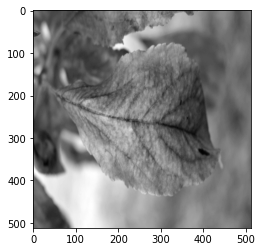

In [9]:
img = cv2.imread(str(listImages[0]))

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray_image = gray_image/255.0
gray_image = cv2.resize(gray_image, (512, 512))
plt.imshow(gray_image, cmap='gray')

print(f'{gray_image.shape} {img.shape}')

plt.show()

In [10]:
all_images = []
for i in range(0, len(listImages)):
  img = cv2.imread(str(listImages[i]))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (100, 100))
  all_images.append(img)

In [11]:
temp = []
for i in range(1821, len(all_images)):
  temp.append(all_images[i])
print(len(temp))
all_images = temp

1821


In [12]:
healthy = 0
rust = 0
multi = 0
scab = 0
Values = datasetObject.values
for i in range(0, len(Values)):
  if Values[i][1] == 1:
    healthy+=1
  if Values[i][2] == 1:
    multi+=1
  if Values[i][3] == 1:
    rust+=1
  if Values[i][4] == 1:
    scab+=1
print(f'{scab} {rust} {healthy} {multi}')  

592 622 516 91


In [13]:
type(all_images)

list

In [14]:
all_images = np.asarray(all_images)
type(all_images)
all_images.shape

(1821, 100, 100)

In [15]:
labels = []
disease = ['healthy', 'multi', 'rust', 'scab']
for i in range(0, len(Values)):
  #healthy
  if Values[i][1] == 1:
    labels.append(0)
  
  #multi disease
  if Values[i][2] == 1:
    labels.append(1)
  
  #rust
  if Values[i][3] == 1:
    labels.append(2)
  #scab
  if Values[i][4] == 1:
    labels.append(3)

In [ ]:
print(len(labels))
print(labels)

1821
[3, 1, 0, 2, 0, 0, 1, 3, 3, 0, 2, 3, 3, 0, 2, 2, 3, 3, 0, 3, 3, 2, 3, 2, 0, 1, 2, 3, 3, 3, 3, 2, 3, 0, 2, 2, 1, 2, 2, 2, 3, 3, 3, 0, 3, 2, 0, 2, 3, 3, 2, 3, 3, 0, 0, 0, 3, 2, 2, 2, 2, 3, 1, 0, 2, 3, 0, 0, 0, 2, 0, 2, 0, 3, 1, 2, 3, 0, 3, 3, 3, 2, 2, 3, 3, 3, 0, 2, 0, 2, 0, 3, 2, 2, 0, 1, 2, 2, 2, 0, 0, 3, 2, 0, 1, 0, 3, 3, 2, 2, 3, 0, 3, 1, 2, 2, 3, 2, 2, 3, 2, 2, 1, 0, 2, 3, 2, 3, 1, 2, 3, 2, 2, 2, 0, 0, 0, 0, 3, 2, 3, 2, 3, 3, 0, 3, 0, 3, 2, 3, 3, 0, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 0, 3, 2, 2, 3, 0, 3, 3, 1, 2, 3, 3, 0, 0, 3, 3, 2, 0, 1, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 0, 3, 3, 0, 0, 3, 0, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 0, 3, 0, 3, 3, 2, 0, 0, 0, 3, 2, 0, 2, 2, 0, 2, 3, 3, 1, 3, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 2, 1, 0, 0, 0, 0, 3, 3, 3, 3, 2, 3, 3, 0, 3, 2, 3, 0, 3, 0, 0, 0, 0, 3, 3, 2, 3, 0, 3, 0, 2, 2, 3, 2, 0, 2, 3, 3, 0, 3, 2, 2, 2, 0, 2, 2, 3, 0, 3, 3, 2, 0, 3, 3, 0, 2, 0, 2, 2, 3, 0, 3, 1, 0, 3, 3, 3, 0, 3, 2, 2, 3, 3, 0, 2, 3, 0, 2, 2, 2, 3, 3, 3, 2, 2, 0, 0, 2

In [16]:
#normalization
#uncomment for the first time only 
all_images = all_images /255.0

In [17]:
#returning the numpy array to a list again after normalization
all_images = list(all_images)

In [18]:
all_images[0]

array([[0.06666667, 0.0745098 , 0.08627451, ..., 0.29019608, 0.27843137,
        0.25882353],
       [0.05882353, 0.07843137, 0.08627451, ..., 0.27058824, 0.27058824,
        0.25882353],
       [0.05882353, 0.0745098 , 0.09411765, ..., 0.28627451, 0.31764706,
        0.30196078],
       ...,
       [0.63529412, 0.61960784, 0.60392157, ..., 0.6627451 , 0.72156863,
        0.67843137],
       [0.65490196, 0.63529412, 0.60784314, ..., 0.70196078, 0.72941176,
        0.72941176],
       [0.64705882, 0.6745098 , 0.62352941, ..., 0.73333333, 0.7254902 ,
        0.72156863]])

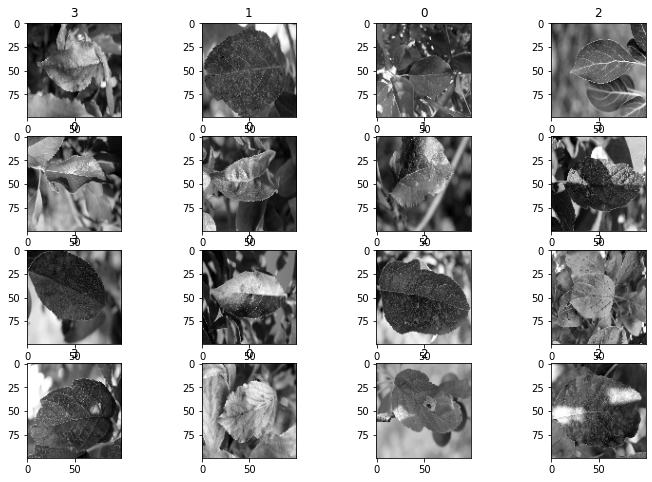

In [19]:
plt.figure(figsize = (12, 8))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.imshow(all_images[i], cmap='gray')
  plt.title(labels[i])
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(all_images, labels, test_size = 0.15, random_state = 42)

In [21]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [22]:
#model Architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(100, 100)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(4, activation='softmax') # output layer (3)
])


In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#x_test=x_test.reshape((-1,10000))
#x_train=x_train.reshape((-1, 10000))

In [ ]:
print(x_test[0])

In [42]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True,)

history= model.fit(
      x_train,
      y_train,
      epochs=40,
      shuffle=True,
      validation_data=(x_test, y_test),verbose=1,
      callbacks=[callback]
    )

Epoch 1/40
49/49 [==============================] - 1s 21ms/step - loss: 1.1234 - accuracy: 0.4990 - val_loss: 1.2929 - val_accuracy: 0.3394
Epoch 2/40
49/49 [==============================] - 1s 13ms/step - loss: 1.1007 - accuracy: 0.5042 - val_loss: 1.3980 - val_accuracy: 0.3394
Epoch 3/40
49/49 [==============================] - 1s 14ms/step - loss: 1.0684 - accuracy: 0.5307 - val_loss: 1.2853 - val_accuracy: 0.3285
Epoch 4/40
49/49 [==============================] - 1s 12ms/step - loss: 1.1016 - accuracy: 0.4945 - val_loss: 1.4434 - val_accuracy: 0.2956
Epoch 5/40
49/49 [==============================] - 1s 12ms/step - loss: 1.0437 - accuracy: 0.5372 - val_loss: 1.3621 - val_accuracy: 0.3431
Epoch 6/40
49/49 [==============================] - 1s 12ms/step - loss: 1.0382 - accuracy: 0.5643 - val_loss: 1.3217 - val_accuracy: 0.2920
Epoch 7/40
49/49 [==============================] - 1s 13ms/step - loss: 1.0413 - accuracy: 0.5462 - val_loss: 1.3885 - val_accuracy: 0.2993
Epoch 8/40
49

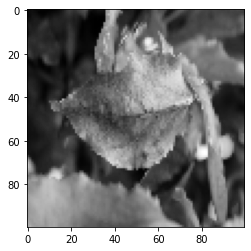

In [ ]:
plt.imshow(all_images[0], cmap='gray')
plt.show()

In [43]:
y_pred = model.predict(x_test)


9/9 [==============================] - 0s 5ms/step


In [44]:
len(y_pred)

274

In [45]:
y_pred_temp = []
for i in range(len(y_pred)):
  y_pred_temp.append(np.argmax(y_pred[i]))
y_pred = y_pred_temp

In [47]:
print(y_pred.count(2))

108


In [29]:
len(x_test)

274

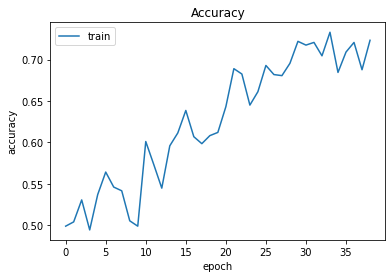

In [48]:
#plotting accuracy 
# history في الموديل الجاهز مفهاش هيستوري 

plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

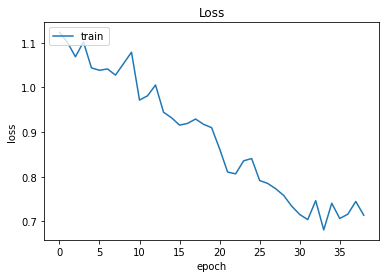

In [49]:
#plotting accuracy 
# history في الموديل الجاهز مفهاش هيستوري 

plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'], loc='upper left')
plt.show()

In [50]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')

9/9 [==============================] - 0s 5ms/step - loss: 1.6010 - accuracy: 0.3066
Test Accuracy: 0.30656933784484863


In [52]:
#confustion matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[34,  0, 32, 12],
       [ 4,  0,  7,  2],
       [39,  1, 35, 15],
       [43,  1, 34, 15]])

In [53]:
#ROC for multiclass 
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(274, 4)

0


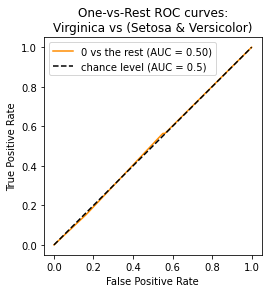

In [54]:
#check the encoding of a specific class: we have classes [0, 1, 2 ,3]
label_binarizer.transform([0])
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
print(class_id)
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_pred,
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

1


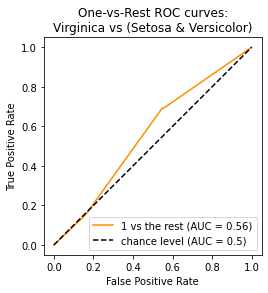

In [55]:
#check the encoding of a specific class: we have classes [0, 1, 2 ,3]
label_binarizer.transform([1])
class_of_interest = 1
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
print(class_id)
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_pred,
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

2


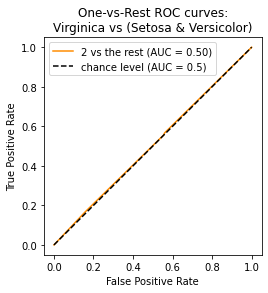

In [57]:
#check the encoding of a specific class: we have classes [0, 1, 2 ,3]
label_binarizer.transform([2])
class_of_interest = 2
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
print(class_id)
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_pred,
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

3


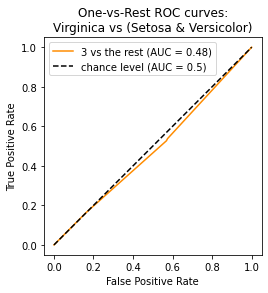

In [58]:
#check the encoding of a specific class: we have classes [0, 1, 2 ,3]
label_binarizer.transform([3])
class_of_interest = 3
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
print(class_id)
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_pred,
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()